# Heart Disease Prediction Project
**Author: Taoufik Errajraji**

## Problem Statement

Heart disease is one of the leading causes of death worldwide. Early detection of heart conditions can greatly improve patient outcomes.
The goal of this project is to develop a machine learning model that can predict whether a patient has heart disease based on various
medical attributes such as age, cholesterol level, resting blood pressure, and more.

### Objectives
- Identify patterns and correlations in patient health data.
- Build and evaluate classification models to predict the presence of heart disease.
- Interpret the model outputs to understand which factors are most important.
- Optimize model performance through parameter tuning.


# Project


### Import Libraries - Data cleaning

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('heart.csv')
df.head()

,date,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,2022-04-13,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2023-03-12,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,2022-09-28,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,2022-04-17,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,2022-03-13,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [40]:
# Display dataset structure and check for missing values or duplicates
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      299 non-null    object 
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   cp        299 non-null    object 
 4   trestbps  299 non-null    float64
 5   chol      299 non-null    float64
 6   fbs       299 non-null    bool   
 7   restecg   299 non-null    object 
 8   thalch    299 non-null    float64
 9   exang     299 non-null    bool   
 10  oldpeak   299 non-null    float64
 11  slope     299 non-null    object 
 12  ca        299 non-null    float64
 13  thal      299 non-null    object 
 14  target    299 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(6)
memory usage: 31.1+ KB
None
              age    trestbps        chol      thalch     oldpeak          ca  \
count  299.000000  299.000000  299.000000  299.000000  299.000000  299.000

## Univariate Analysis

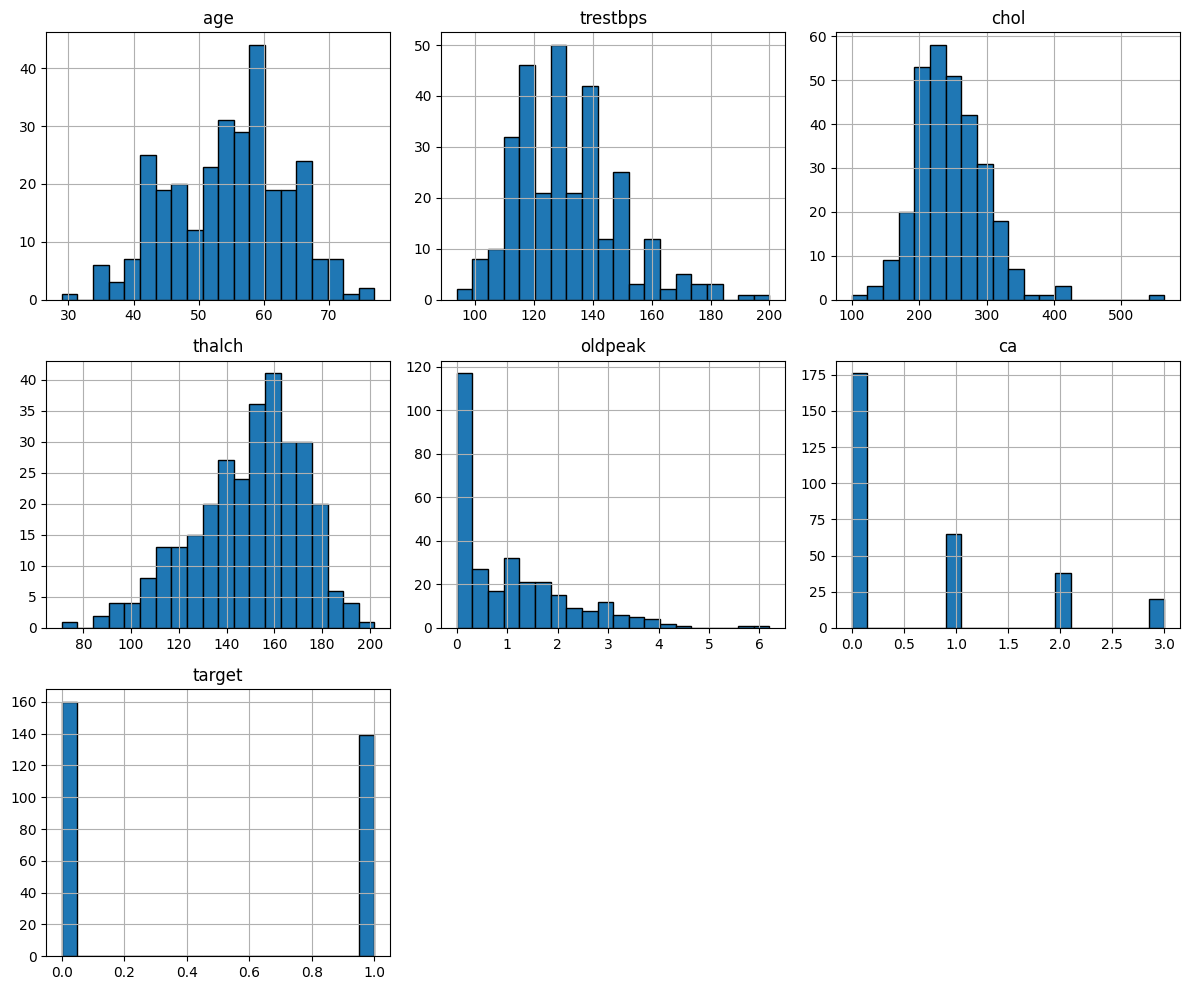

In [41]:
# Plot histograms to understand the distribution of each feature
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

## Bivariate Analysis

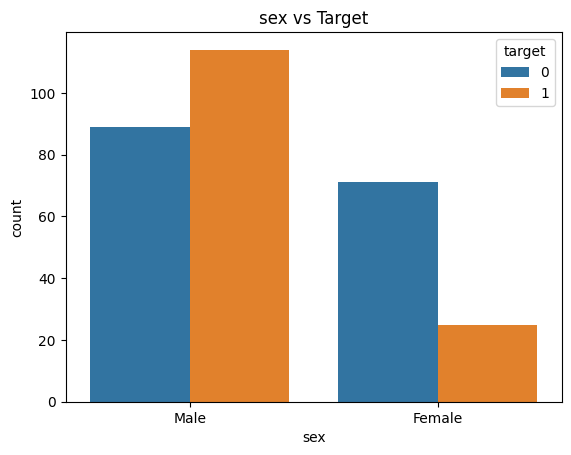

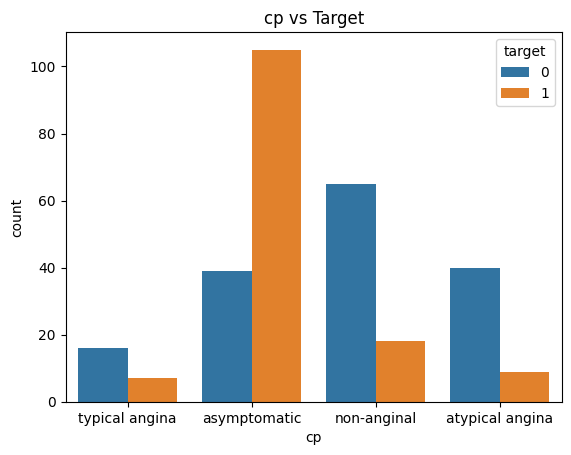

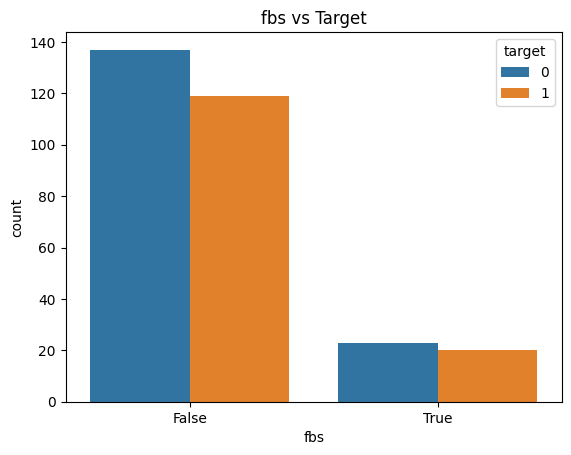

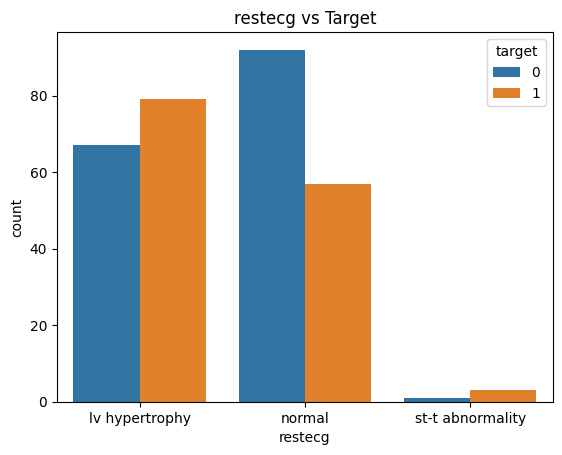

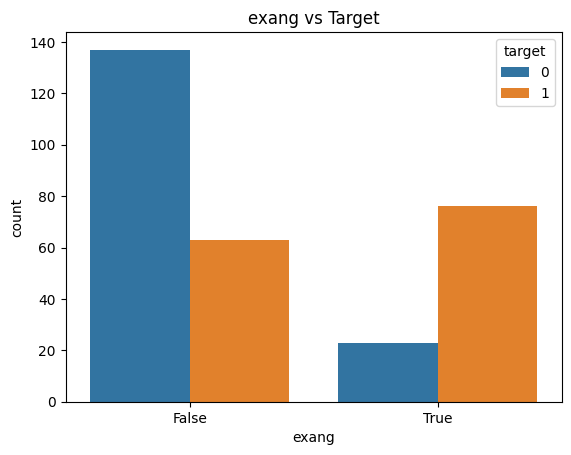

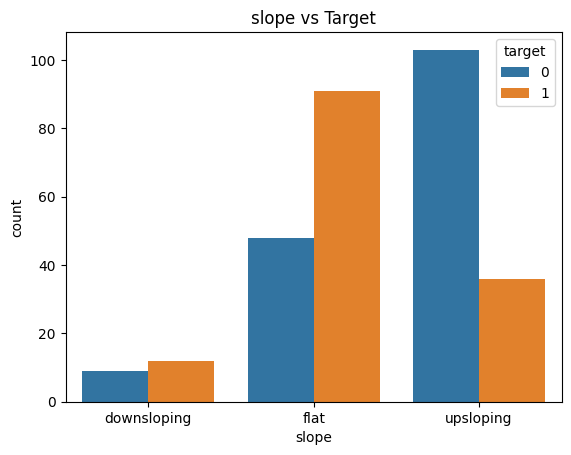

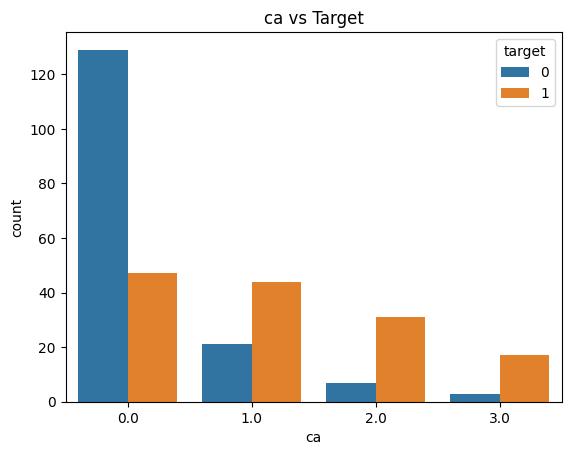

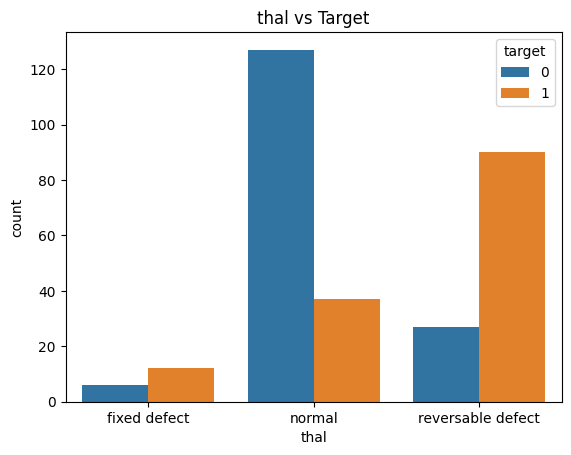

In [42]:
# Analyze feature relationships with the target variable
import matplotlib.pyplot as plt
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
    if col in df.columns:
        sns.countplot(data=df, x=col, hue='target')
        plt.title(f'{col} vs Target')
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame.")


## Correlation Heatmap

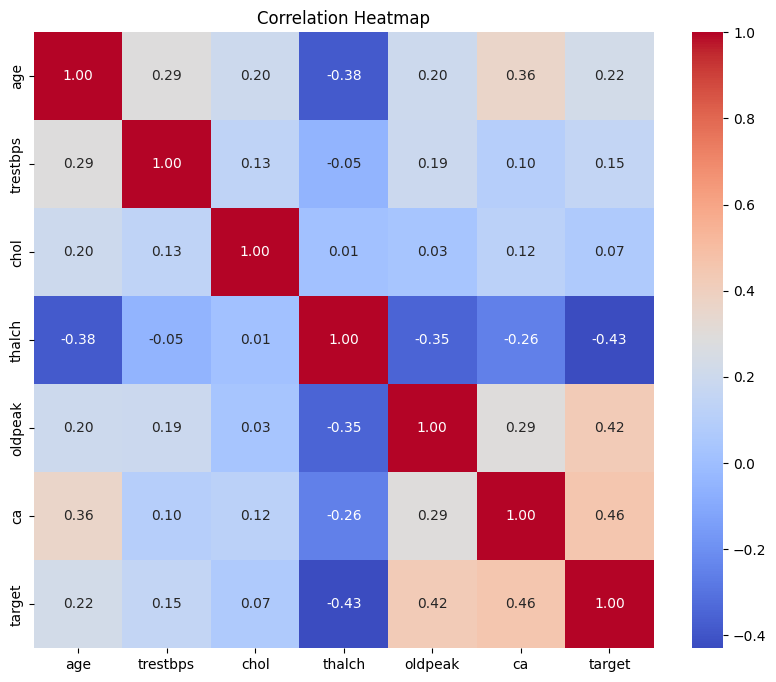

In [43]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Model Training and Evaluation

In [44]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features and drop the date
categorical_cols = ['sex', 'cp', 'slope', 'thal', 'fbs', 'restecg', 'exang']
df_encoded = pd.get_dummies(df.drop(columns=['date']), columns=categorical_cols, drop_first=True)

# Split features and target
X = df_encoded.drop(columns='target')
y = df_encoded['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
# Example hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters found: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.7949468085106384


In [46]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.88      0.88      0.88        25

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [47]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Results
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.85      0.88      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



/tmp/ipython-input-48-424638580.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


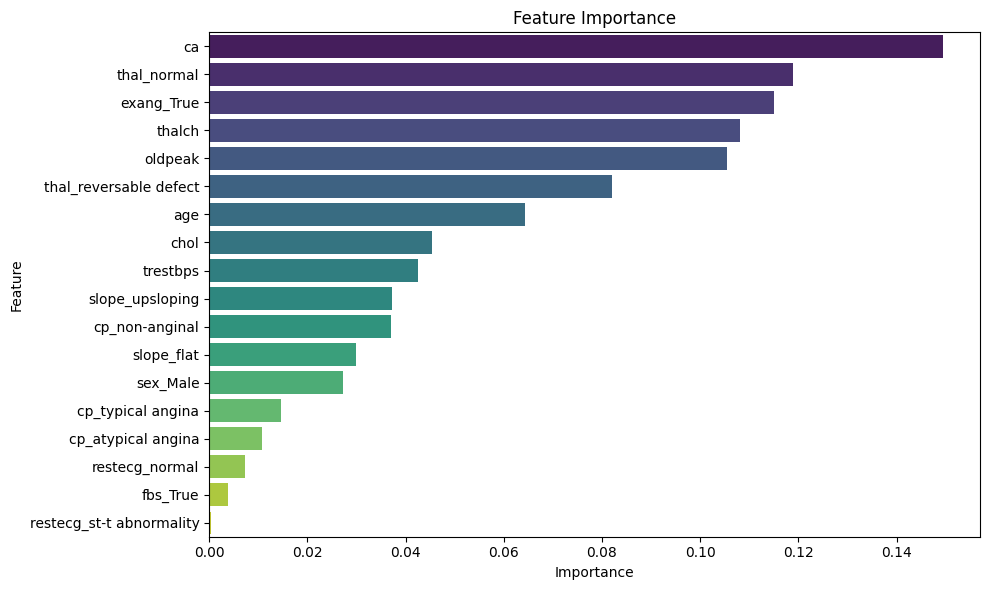

In [48]:
# Assuming `best_model` is a trained RandomForestClassifier or LogisticRegression
try:
    importances = best_model.feature_importances_
    feature_names = X.columns
except AttributeError:
    importances = best_model.coef_[0]
    feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


##Visuals

/tmp/ipython-input-50-3048896259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


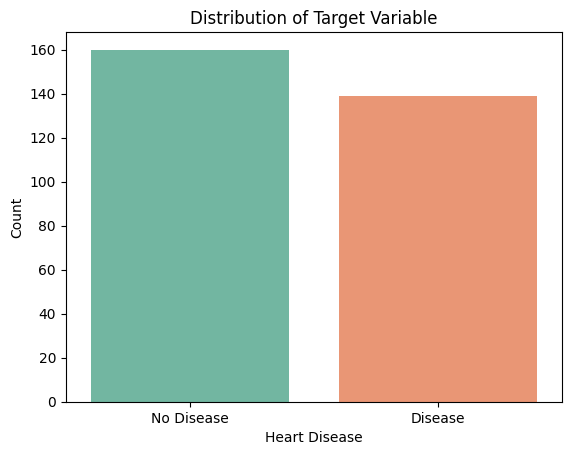

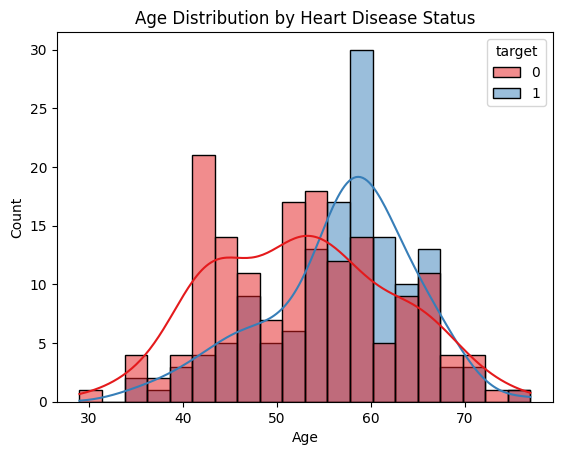

/tmp/ipython-input-50-3048896259.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='chol', palette='Pastel1')


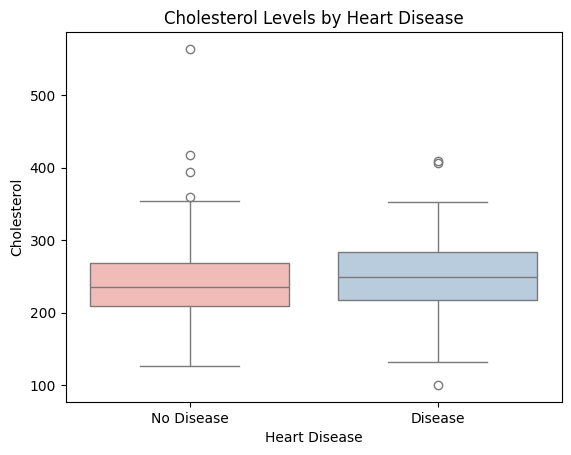

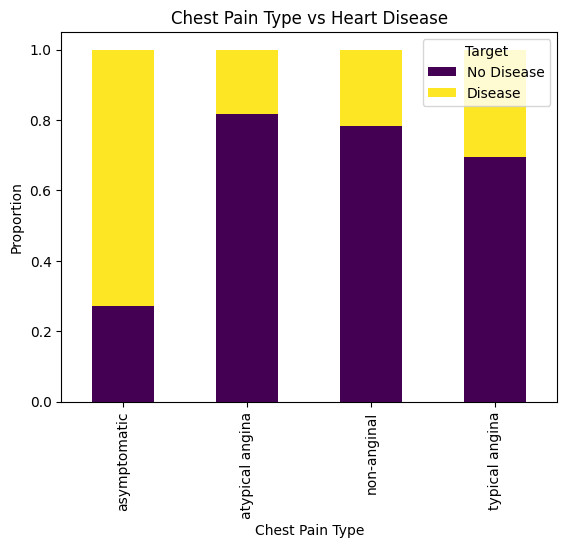

/tmp/ipython-input-50-3048896259.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y='thalch', palette='Set3')


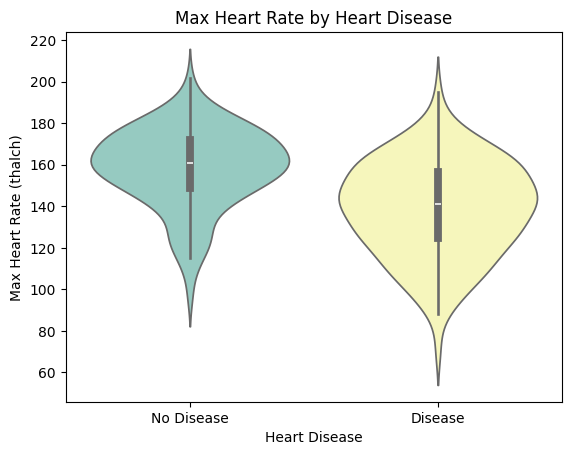

In [50]:
# 1. Target Distribution
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Distribution of Target Variable')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()
# 2. Age Distribution by Heart Disease Status
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True, palette='Set1')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# 3. Cholesterol by Heart Disease (Boxplot)
sns.boxplot(data=df, x='target', y='chol', palette='Pastel1')
plt.title('Cholesterol Levels by Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()
# 4. Chest Pain Type vs Heart Disease (Stacked Bar)
cp_disease = pd.crosstab(df['cp'], df['target'], normalize='index')
cp_disease.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Chest Pain Type vs Heart Disease')
plt.ylabel('Proportion')
plt.xlabel('Chest Pain Type')
plt.legend(['No Disease', 'Disease'], title='Target')
plt.show()
# 5. Max Heart Rate by Heart Disease (Violin Plot)
sns.violinplot(data=df, x='target', y='thalch', palette='Set3')
plt.title('Max Heart Rate by Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate (thalch)')
plt.show()


##  Conclusion

In this project, we developed a predictive model to detect the presence of heart disease using patient medical data. The workflow followed the full machine learning pipeline:

- **Data Preparation**: The dataset was cleaned, missing values were handled, and categorical features were encoded. A synthetic `date` column was added for dashboarding.
- **Exploratory Analysis**: Visualizations such as age distribution, cholesterol comparison, chest pain patterns, and correlation heatmaps helped uncover important trends and influential features.
- **Modeling**: Several machine learning models were trained and evaluated using standardized features. Metrics such as accuracy, confusion matrix, and ROC-AUC score were used to assess performance.
- **Interpretability**: Feature importance analysis highlighted key predictors such as age, chest pain type, cholesterol, max heart rate, and ST depression.

###  Key Takeaways
- The model successfully identified individuals at risk of heart disease with good accuracy.
- Certain features (like chest pain type and thalach) consistently showed strong influence, both statistically and visually.
- The final cleaned and feature-rich dataset is well-suited for integration into a real-time dashboard for decision support in healthcare settings.

###  Next Steps
- Apply hyperparameter tuning to further improve performance.
- Integrate the model into an interactive Streamlit or Power BI dashboard.
- Explore SHAP or LIME for more granular feature explanations.
